In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
import math

from sklearn.metrics import mean_absolute_error
import datetime
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier 

%matplotlib inline

In [2]:
np.random.seed(0) # so things are 'random'


# Functions

In [3]:
def get_evaluation_metrics(y_true, y_pred, model_type=None):
    if model_type: 
        print("Model Type: {}".format(model_type))
    print("\tMSE: {:.4f}".format(mean_squared_error(y_true, y_pred)))
    print("\tRMSE: {:.4f}".format(math.sqrt(mean_squared_error(y_true, y_pred))))
    print("\tExplained Variance Score: {:.4f}".format(explained_variance_score(y_true, y_pred)))
    print("\tMAE: {:.4f}\n==========".format(mean_absolute_error(y_true, y_pred)))
    
def get_data_split_by_ticker(feature_set):
    aapl = feature_set.loc[feature_set["ticker_symbol"]=="AAPL"]
    amzn = feature_set.loc[feature_set["ticker_symbol"]=="AMZN"]
    goog = feature_set.loc[feature_set["ticker_symbol"]=="GOOG"]
    googl = feature_set.loc[feature_set["ticker_symbol"]=="GOOGL"]
    msft = feature_set.loc[feature_set["ticker_symbol"]=="MSFT"]
    tsla = feature_set.loc[feature_set["ticker_symbol"]=="TSLA"]
    return aapl, amzn, goog, googl, msft, tsla


def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


# Load data

In [4]:
cd = os.getcwd()
raw_data_directory_path = "/".join(cd.split("/")[:-1]) + "/data/raw/"
processed_data_directory_path = "/".join(cd.split("/")[:-1]) + "/data/processed/"
weekly_data = pd.read_csv(processed_data_directory_path + "weekly_data.csv")

# Weekly linear regression `close_value` model

In [5]:
# notes: look into removing extra columns (negative, positive, ratio_neg)
# try with daily data
# try PCA

In [6]:
def build_lr_model_one():
    current_features_indices = [0, 6, 7, 8, 9, 10, 11, 12, 14, 15]

    features = weekly_data.iloc[:, current_features_indices]
    response_variable = weekly_data.iloc[:, 5]

    current_features = pd.get_dummies(features, prefix='ticker')

    X_train, X_test, y_train, y_test = train_test_split(current_features, response_variable, test_size=0.25, random_state=42)

    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    get_evaluation_metrics(y_test, y_pred)

In [7]:
build_lr_model_one()

	MSE: 48093.9168
	RMSE: 219.3033
	Explained Variance Score: 0.7985
	MAE: 154.0412


# Weekly linear regression `close_value` combined model

In [8]:
def build_lr_model_two():
    aapl, amzn, goog, googl, msft, tsla = get_data_split_by_ticker(weekly_data)

    current_feature_indices = [6, 7, 8, 9, 10, 11, 12, 14, 15]

    aapl_features = aapl.iloc[:, current_feature_indices]
    aapl_rv = aapl.iloc[:, 5]

    amzn_features = amzn.iloc[:, current_feature_indices]
    amzn_rv = amzn.iloc[:, 5]

    goog_features = goog.iloc[:, current_feature_indices]
    goog_rv = goog.iloc[:, 5]

    googl_features = googl.iloc[:, current_feature_indices]
    googl_rv = googl.iloc[:, 5]

    msft_features = msft.iloc[:, current_feature_indices]
    msft_rv = msft.iloc[:, 5]

    tsla_features = tsla.iloc[:, current_feature_indices]
    tsla_rv = tsla.iloc[:, 5]

    X_train_aapl, X_test_aapl, y_train_aapl, y_test_aapl = train_test_split(aapl_features, aapl_rv, test_size=0.25, random_state=42)
    X_train_amzn, X_test_amzn, y_train_amzn, y_test_amzn = train_test_split(amzn_features, amzn_rv, test_size=0.25, random_state=42)
    X_train_goog, X_test_goog, y_train_goog, y_test_goog = train_test_split(goog_features, goog_rv, test_size=0.25, random_state=42)
    X_train_googl, X_test_googl, y_train_googl, y_test_googl = train_test_split(googl_features, googl_rv, test_size=0.25, random_state=42)
    X_train_msft, X_test_msft, y_train_msft, y_test_msft = train_test_split(msft_features, msft_rv, test_size=0.25, random_state=42)
    X_train_tsla, X_test_tsla, y_train_tsla, y_test_tsla = train_test_split(tsla_features, tsla_rv, test_size=0.25, random_state=42)

    reg_aapl = LinearRegression().fit(X_train_aapl, y_train_aapl)
    y_pred_aapl = reg_aapl.predict(X_test_aapl)

    reg_amzn = LinearRegression().fit(X_train_amzn, y_train_amzn)
    y_pred_amzn = reg_amzn.predict(X_test_amzn)

    reg_goog = LinearRegression().fit(X_train_goog, y_train_goog)
    y_pred_goog = reg_goog.predict(X_test_goog)


    reg_googl = LinearRegression().fit(X_train_googl, y_train_googl)
    y_pred_googl = reg_googl.predict(X_test_googl)


    reg_msft = LinearRegression().fit(X_train_msft, y_train_msft)
    y_pred_msft = reg_msft.predict(X_test_msft)

    reg_tsla = LinearRegression().fit(X_train_tsla, y_train_tsla)
    y_pred_tsla = reg_tsla.predict(X_test_tsla)

    all_ticker_true = y_test_aapl + y_test_amzn + y_test_goog + y_test_googl + y_test_msft + y_test_tsla

    all_ticker_true = pd.concat([y_test_aapl, y_test_amzn, y_test_goog, y_test_googl, y_test_msft, y_test_tsla])
    all_ticker_pred = np.concatenate([y_pred_aapl, y_pred_amzn, y_pred_goog, y_pred_googl, y_pred_msft, y_pred_tsla])

    get_evaluation_metrics(all_ticker_true, all_ticker_pred, "Combined Ticker Models")


In [9]:
build_lr_model_two()

Model Type: Combined Ticker Models
	MSE: 14760.5070
	RMSE: 121.4928
	Explained Variance Score: 0.9396
	MAE: 76.5480


### Between the two model types, it appears that there's a pretty significant performance boost when switching to a model that combines models for each `ticker_symbol`. All metrics seem to be worse for the model that uses `ticker_symbol` as a feature. 

#### Note: performance increase may be due to stratification of `ticker_symbol` variable rather than due to the different types of models. We should look into this. 

# Weekly linear regression `close_value`  model without `volume` as feature

In [10]:
def build_lr_model_three():
    current_features_indices = [0, 7, 8, 9, 10, 11, 12, 14, 15]

    features = weekly_data.iloc[:, current_features_indices]
    response_variable = weekly_data.iloc[:, 5]

    current_features = pd.get_dummies(features, prefix='ticker')

    X_train, X_test, y_train, y_test = train_test_split(current_features, response_variable, test_size=0.25, random_state=42)

    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    get_evaluation_metrics(y_test, y_pred)

In [11]:
build_lr_model_three()

	MSE: 48281.0135
	RMSE: 219.7294
	Explained Variance Score: 0.7978
	MAE: 155.3529


# Weekly linear regression `close_value` combined model without `volume` as feature

In [12]:
def build_lr_model_four():
    aapl, amzn, goog, googl, msft, tsla = get_data_split_by_ticker(weekly_data)

    current_feature_indices = [7, 8, 9, 10, 11, 12, 14, 15]

    aapl_features = aapl.iloc[:, current_feature_indices]
    aapl_rv = aapl.iloc[:, 5]

    amzn_features = amzn.iloc[:, current_feature_indices]
    amzn_rv = amzn.iloc[:, 5]

    goog_features = goog.iloc[:, current_feature_indices]
    goog_rv = goog.iloc[:, 5]

    googl_features = googl.iloc[:, current_feature_indices]
    googl_rv = googl.iloc[:, 5]

    msft_features = msft.iloc[:, current_feature_indices]
    msft_rv = msft.iloc[:, 5]

    tsla_features = tsla.iloc[:, current_feature_indices]
    tsla_rv = tsla.iloc[:, 5]

    X_train_aapl, X_test_aapl, y_train_aapl, y_test_aapl = train_test_split(aapl_features, aapl_rv, test_size=0.25, random_state=42)
    X_train_amzn, X_test_amzn, y_train_amzn, y_test_amzn = train_test_split(amzn_features, amzn_rv, test_size=0.25, random_state=42)
    X_train_goog, X_test_goog, y_train_goog, y_test_goog = train_test_split(goog_features, goog_rv, test_size=0.25, random_state=42)
    X_train_googl, X_test_googl, y_train_googl, y_test_googl = train_test_split(googl_features, googl_rv, test_size=0.25, random_state=42)
    X_train_msft, X_test_msft, y_train_msft, y_test_msft = train_test_split(msft_features, msft_rv, test_size=0.25, random_state=42)
    X_train_tsla, X_test_tsla, y_train_tsla, y_test_tsla = train_test_split(tsla_features, tsla_rv, test_size=0.25, random_state=42)

    reg_aapl = LinearRegression().fit(X_train_aapl, y_train_aapl)
    y_pred_aapl = reg_aapl.predict(X_test_aapl)

    reg_amzn = LinearRegression().fit(X_train_amzn, y_train_amzn)
    y_pred_amzn = reg_amzn.predict(X_test_amzn)

    reg_goog = LinearRegression().fit(X_train_goog, y_train_goog)
    y_pred_goog = reg_goog.predict(X_test_goog)


    reg_googl = LinearRegression().fit(X_train_googl, y_train_googl)
    y_pred_googl = reg_googl.predict(X_test_googl)


    reg_msft = LinearRegression().fit(X_train_msft, y_train_msft)
    y_pred_msft = reg_msft.predict(X_test_msft)

    reg_tsla = LinearRegression().fit(X_train_tsla, y_train_tsla)
    y_pred_tsla = reg_tsla.predict(X_test_tsla)

#     all_ticker_true = y_test_aapl + y_test_amzn + y_test_goog + y_test_googl + y_test_msft + y_test_tsla

    all_ticker_true = pd.concat([y_test_aapl, y_test_amzn, y_test_goog, y_test_googl, y_test_msft, y_test_tsla])
    all_ticker_pred = np.concatenate([y_pred_aapl, y_pred_amzn, y_pred_goog, y_pred_googl, y_pred_msft, y_pred_tsla])

    get_evaluation_metrics(all_ticker_true, all_ticker_pred, "Combined Ticker Models")


In [13]:
build_lr_model_four()

Model Type: Combined Ticker Models
	MSE: 15294.3563
	RMSE: 123.6704
	Explained Variance Score: 0.9374
	MAE: 77.9087


In [14]:
daily_df = pd.read_csv(processed_data_directory_path + 'daily_data.csv')
daily_df['price_indicator'] = daily_df['pct_change'].apply(lambda c: 1 if c > 0 else 0)


# Classification Models: 

In [15]:
def build_logistic_regression_model_one():
    current_features_indices = [0, 6, 7, 8, 9, 10, 11, 12, 14, 15]

#     df_shuffled = shuffle(daily_df)
#     num_train = int(len(df_shuffled)/4)*3
#     num_test = int(num_train + num_train/2)

    features = daily_df.iloc[:, current_features_indices]
    response_variable = daily_df.iloc[:, -1]
    current_features = pd.get_dummies(features, prefix='ticker')


    X = current_features
    y = response_variable
    combined = current_features
    combined["rv"] = response_variable
    combined = clean_dataset(combined)
    current_features, response_variable = combined.iloc[:, :-1], combined.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(current_features, response_variable, test_size=0.25, random_state=42)

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)

    get_classification_metrics(y_test, y_pred, X_test, logreg)


In [16]:
def get_classification_metrics(current_y_test, current_y_pred, current_X_test, logreg=None):
    y_test, y_pred, X_test = current_y_test, current_y_pred, current_X_test
    if logreg: 
        print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print(classification_report(y_test, y_pred))

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.63


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.63      1.00      0.78      1733
         1.0       0.00      0.00      0.00      1006

    accuracy                           0.63      2739
   macro avg       0.32      0.50      0.39      2739
weighted avg       0.40      0.63      0.49      2739

Accuracy: 0.6327126688572472
Precision: 0.0
Recall: 0.0


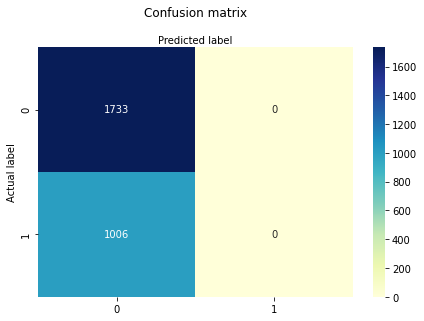

In [17]:
build_logistic_regression_model_one()

In [18]:
def build_logistic_regression_model_two():
    aapl, amzn, goog, googl, msft, tsla = get_data_split_by_ticker(daily_df)
    
    current_feature_indices = [6, 7, 8, 9, 10, 11, 12, 14, 15]
    
    aapl_features = aapl.iloc[:, current_feature_indices]
    aapl_rv = aapl.iloc[:, -1]
    aapl_combined = aapl_features
    aapl_combined["rv"] = aapl_rv
    aapl_combined = clean_dataset(aapl_combined)
    aapl_rv = aapl_combined.iloc[:, -1]
    aapl_features = aapl_combined.iloc[:, :-1]
    
    amzn_features = amzn.iloc[:, current_feature_indices]
    amzn_rv = amzn.iloc[:, -1]
    amzn_combined = amzn_features
    amzn_combined["rv"] = amzn_rv
    amzn_combined = clean_dataset(amzn_combined)
    amzn_rv = amzn_combined.iloc[:, -1]
    amzn_features = amzn_combined.iloc[:, :-1]


    goog_features = goog.iloc[:, current_feature_indices]
    goog_rv = goog.iloc[:, -1]
    goog_combined = goog_features
    goog_combined["rv"] = goog_rv
    goog_combined = clean_dataset(goog_combined)
    goog_rv = goog_combined.iloc[:, -1]
    goog_features = goog_combined.iloc[:, :-1]


    googl_features = googl.iloc[:, current_feature_indices]
    googl_rv = googl.iloc[:, -1]
    googl_combined = googl_features
    googl_combined["rv"] = googl_rv
    googl_combined = clean_dataset(googl_combined)
    googl_rv = googl_combined.iloc[:, -1]
    googl_features = googl_combined.iloc[:, :-1]

    msft_features = msft.iloc[:, current_feature_indices]
    msft_rv = msft.iloc[:, -1]
    msft_combined = msft_features
    msft_combined["rv"] = msft_rv
    msft_combined = clean_dataset(msft_combined)
    msft_rv = msft_combined.iloc[:, -1]
    msft_features = msft_combined.iloc[:, :-1]


    tsla_features = tsla.iloc[:, current_feature_indices]
    tsla_rv = tsla.iloc[:, -1]
    tsla_combined = tsla_features
    tsla_combined["rv"] = tsla_rv
    tsla_combined = clean_dataset(tsla_combined)
    tsla_rv = tsla_combined.iloc[:, -1]
    tsla_features = tsla_combined.iloc[:, :-1]  
    
    X_train_aapl, X_test_aapl, y_train_aapl, y_test_aapl = train_test_split(aapl_features, aapl_rv, test_size=0.25, random_state=42)
    X_train_amzn, X_test_amzn, y_train_amzn, y_test_amzn = train_test_split(amzn_features, amzn_rv, test_size=0.25, random_state=42)
    X_train_goog, X_test_goog, y_train_goog, y_test_goog = train_test_split(goog_features, goog_rv, test_size=0.25, random_state=42)
    X_train_googl, X_test_googl, y_train_googl, y_test_googl = train_test_split(googl_features, googl_rv, test_size=0.25, random_state=42)
    X_train_msft, X_test_msft, y_train_msft, y_test_msft = train_test_split(msft_features, msft_rv, test_size=0.25, random_state=42)
    X_train_tsla, X_test_tsla, y_train_tsla, y_test_tsla = train_test_split(tsla_features, tsla_rv, test_size=0.25, random_state=42)

    
    reg_aapl = LogisticRegression().fit(X_train_aapl, y_train_aapl)
    y_pred_aapl = reg_aapl.predict(X_test_aapl)

    reg_amzn = LogisticRegression().fit(X_train_amzn, y_train_amzn)
    y_pred_amzn = reg_amzn.predict(X_test_amzn)

    reg_goog = LogisticRegression().fit(X_train_goog, y_train_goog)
    y_pred_goog = reg_goog.predict(X_test_goog)

    reg_googl = LogisticRegression().fit(X_train_googl, y_train_googl)
    y_pred_googl = reg_googl.predict(X_test_googl)


    reg_msft = LogisticRegression().fit(X_train_msft, y_train_msft)
    y_pred_msft = reg_msft.predict(X_test_msft)

    reg_tsla = LogisticRegression().fit(X_train_tsla, y_train_tsla)
    y_pred_tsla = reg_tsla.predict(X_test_tsla)


    all_ticker_true = pd.concat([y_test_aapl, y_test_amzn, y_test_goog, y_test_googl, y_test_msft, y_test_tsla])
    all_ticker_pred = np.concatenate([y_pred_aapl, y_pred_amzn, y_pred_goog, y_pred_googl, y_pred_msft, y_pred_tsla])

    
    all_ticker_X_test = pd.concat([X_test_aapl, X_test_amzn, X_test_goog, X_test_googl, X_test_msft, X_test_tsla])
    
    get_classification_metrics(all_ticker_true, all_ticker_pred, all_ticker_X_test)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77      1716
         1.0       0.00      0.00      0.00      1026

    accuracy                           0.63      2742
   macro avg       0.31      0.50      0.38      2742
weighted avg       0.39      0.63      0.48      2742

Accuracy: 0.6258205689277899
Precision: 0.0
Recall: 0.0


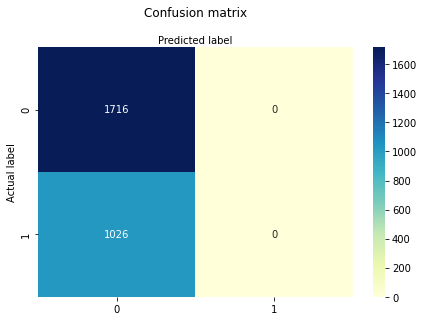

In [19]:
build_logistic_regression_model_two()

In [20]:
def build_dt_model_one():
    current_features_indices = [0, 6, 7, 8, 9, 10, 11, 12, 14, 15]
#     current_features_indices = [0, 6, 7, 8, 9, 10, 14]

    features = daily_df.iloc[:, current_features_indices]
    response_variable = daily_df.iloc[:, -1]
    current_features = pd.get_dummies(features, prefix='ticker')
    print(current_features)
    
    X = current_features
    y = response_variable
    combined = current_features
    combined["rv"] = response_variable
    combined = clean_dataset(combined)
    current_features, response_variable = combined.iloc[:, :-1], combined.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(current_features, response_variable, test_size=0.25, random_state=42)
    ###### Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=95)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    get_classification_metrics(y_test, y_pred, X_test)


            volume  reaction_num  compound  writer  body  positive  negative  \
0      12267519660          1700  0.149360     144   297       264        33   
1      47510530380          2405  0.104502     403   894       740       154   
2      17165437710           210  0.237682     128   323       291        32   
3      24180415350           870  0.228038     188   455       404        51   
4      76603579840          1037  0.136677     483  1193      1003       190   
...            ...           ...       ...     ...   ...       ...       ...   
10951  12177199421         16595  0.124667     631  1223       955       268   
10952   5924312065          6036  0.136459     317   595       455       140   
10953   6730815052         10487  0.075163     296   676       476       200   
10954  18259240230         15913  0.093479     665  1449      1096       353   
10955   8779468380          8443  0.134275     468   853       667       186   

       ratio_pos  ratio_neg  ticker_AAP

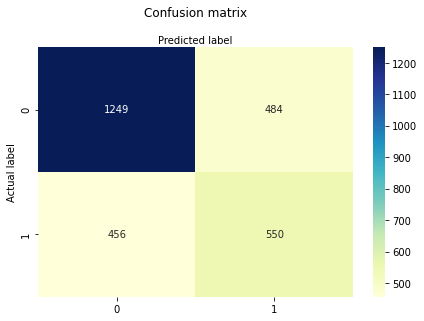

In [21]:
build_dt_model_one()

In [25]:
def build_dt_model_two():
    aapl, amzn, goog, googl, msft, tsla = get_data_split_by_ticker(daily_df)
    
    current_feature_indices = [6, 7, 8, 9, 10, 14]
#     current_feature_indices = [6, 7, 8, 9, 10, 11, 12, 14, 15]


    aapl_features = aapl.iloc[:, current_feature_indices]
    aapl_rv = aapl.iloc[:, -1]
    aapl_combined = aapl_features
    aapl_combined["rv"] = aapl_rv
    aapl_combined = clean_dataset(aapl_combined)
    aapl_rv = aapl_combined.iloc[:, -1]
    aapl_features = aapl_combined.iloc[:, :-1]
    
    amzn_features = amzn.iloc[:, current_feature_indices]
    amzn_rv = amzn.iloc[:, -1]
    amzn_combined = amzn_features
    amzn_combined["rv"] = amzn_rv
    amzn_combined = clean_dataset(amzn_combined)
    amzn_rv = amzn_combined.iloc[:, -1]
    amzn_features = amzn_combined.iloc[:, :-1]


    goog_features = goog.iloc[:, current_feature_indices]
    goog_rv = goog.iloc[:, -1]
    goog_combined = goog_features
    goog_combined["rv"] = goog_rv
    goog_combined = clean_dataset(goog_combined)
    goog_rv = goog_combined.iloc[:, -1]
    goog_features = goog_combined.iloc[:, :-1]


    googl_features = googl.iloc[:, current_feature_indices]
    googl_rv = googl.iloc[:, -1]
    googl_combined = googl_features
    googl_combined["rv"] = googl_rv
    googl_combined = clean_dataset(googl_combined)
    googl_rv = googl_combined.iloc[:, -1]
    googl_features = googl_combined.iloc[:, :-1]

    msft_features = msft.iloc[:, current_feature_indices]
    msft_rv = msft.iloc[:, -1]
    msft_combined = msft_features
    msft_combined["rv"] = msft_rv
    msft_combined = clean_dataset(msft_combined)
    msft_rv = msft_combined.iloc[:, -1]
    msft_features = msft_combined.iloc[:, :-1]


    tsla_features = tsla.iloc[:, current_feature_indices]
    tsla_rv = tsla.iloc[:, -1]
    tsla_combined = tsla_features
    tsla_combined["rv"] = tsla_rv
    tsla_combined = clean_dataset(tsla_combined)
    tsla_rv = tsla_combined.iloc[:, -1]
    tsla_features = tsla_combined.iloc[:, :-1]  
    
    X_train_aapl, X_test_aapl, y_train_aapl, y_test_aapl = train_test_split(aapl_features, aapl_rv, test_size=0.25, random_state=42)
    X_train_amzn, X_test_amzn, y_train_amzn, y_test_amzn = train_test_split(amzn_features, amzn_rv, test_size=0.25, random_state=42)
    X_train_goog, X_test_goog, y_train_goog, y_test_goog = train_test_split(goog_features, goog_rv, test_size=0.25, random_state=42)
    X_train_googl, X_test_googl, y_train_googl, y_test_googl = train_test_split(googl_features, googl_rv, test_size=0.25, random_state=42)
    X_train_msft, X_test_msft, y_train_msft, y_test_msft = train_test_split(msft_features, msft_rv, test_size=0.25, random_state=42)
    X_train_tsla, X_test_tsla, y_train_tsla, y_test_tsla = train_test_split(tsla_features, tsla_rv, test_size=0.25, random_state=42)

    
    dt_aapl = DecisionTreeClassifier(criterion="entropy", max_depth=95).fit(X_train_aapl, y_train_aapl)
    y_pred_aapl = dt_aapl.predict(X_test_aapl)

    dt_amzn = DecisionTreeClassifier(criterion="entropy", max_depth=95).fit(X_train_amzn, y_train_amzn)
    y_pred_amzn = dt_amzn.predict(X_test_amzn)

    dt_goog = DecisionTreeClassifier(criterion="entropy", max_depth=95).fit(X_train_goog, y_train_goog)
    y_pred_goog = dt_goog.predict(X_test_goog)

    dt_googl = DecisionTreeClassifier(criterion="entropy", max_depth=95).fit(X_train_googl, y_train_googl)
    y_pred_googl = dt_googl.predict(X_test_googl)


    dt_msft = DecisionTreeClassifier(criterion="entropy", max_depth=95).fit(X_train_msft, y_train_msft)
    y_pred_msft = dt_msft.predict(X_test_msft)

    dt_tsla = DecisionTreeClassifier(criterion="entropy", max_depth=95).fit(X_train_tsla, y_train_tsla)
    y_pred_tsla = dt_tsla.predict(X_test_tsla)


    all_ticker_true = pd.concat([y_test_aapl, y_test_amzn, y_test_goog, y_test_googl, y_test_msft, y_test_tsla])
    all_ticker_pred = np.concatenate([y_pred_aapl, y_pred_amzn, y_pred_goog, y_pred_googl, y_pred_msft, y_pred_tsla])

    
    all_ticker_X_test = pd.concat([X_test_aapl, X_test_amzn, X_test_goog, X_test_googl, X_test_msft, X_test_tsla])
    
    get_classification_metrics(all_ticker_true, all_ticker_pred, all_ticker_X_test)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75      1716
         1.0       0.58      0.55      0.57      1026

    accuracy                           0.68      2742
   macro avg       0.66      0.66      0.66      2742
weighted avg       0.68      0.68      0.68      2742

Accuracy: 0.6812545587162655
Precision: 0.5772357723577236
Recall: 0.5536062378167641


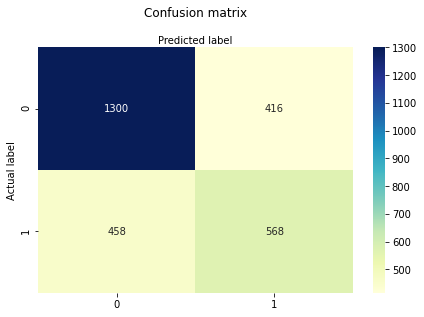

In [26]:
build_dt_model_two()

In [24]:
# NEXT STEPS: 
# - hyperparameter tuning
# - operationalization
# - add in S&P 500 data